In [2]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
X_scaled = scaler.fit_transform(X)

# Convert the standardized features back to a DataFrame (optional)
X = pd.DataFrame(X_scaled, columns=iris.feature_names)

In [6]:
from sklearn.cluster import KMeans
import numpy as np

def bisecting_kmeans(data, num_clusters):
    cluster_assignments = [data]

    while len(cluster_assignments) < num_clusters:
        cluster_to_split = None
        max_sse = -1

        for i, cluster_data in enumerate(cluster_assignments):
            kmeans = KMeans(n_clusters=2, random_state=0)
            kmeans.fit(cluster_data)
            labels = kmeans.labels_
            centers = kmeans.cluster_centers_

            sse = np.sum((cluster_data - centers[labels]) ** 2)

            if sse > max_sse:
                max_sse = sse
                cluster_to_split = i

        kmeans = KMeans(n_clusters=2, random_state=0)
        kmeans.fit(cluster_assignments[cluster_to_split])
        labels = kmeans.labels_

        cluster1 = cluster_assignments[cluster_to_split][labels == 0]
        cluster2 = cluster_assignments[cluster_to_split][labels == 1]

        cluster_assignments.pop(cluster_to_split)
        cluster_assignments.append(cluster1)
        cluster_assignments.append(cluster2)

    return cluster_assignments

result_clusters = bisecting_kmeans(np.array(X).reshape(-1,1), num_clusters=3)
print(len(result_clusters))

3


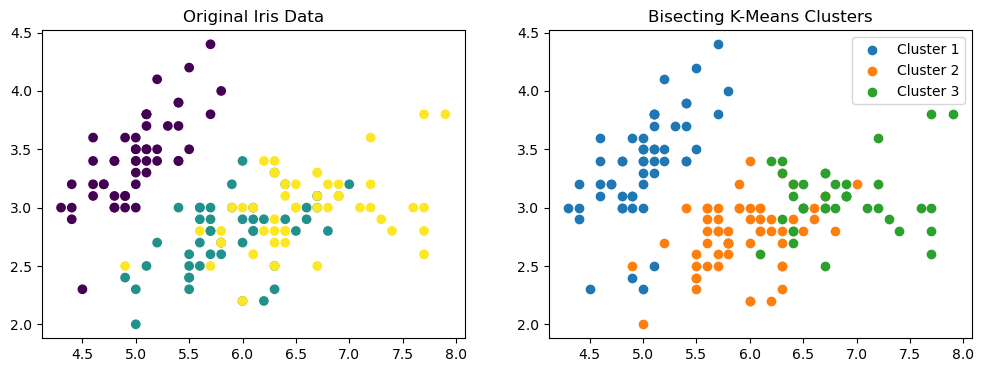

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Number of clusters you want to create
num_clusters = 3  # You can adjust this as needed

# Initialize a list to store cluster assignments
cluster_assignments = [X]

while len(cluster_assignments) < num_clusters:
    # Find the cluster with the highest SSE and split it
    cluster_to_split = None
    max_sse = -1

    for i, cluster_data in enumerate(cluster_assignments):
        kmeans = KMeans(n_clusters=2, random_state=0)
        kmeans.fit(cluster_data)
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_

        # Calculate SSE for this cluster
        sse = np.sum((cluster_data - centers[labels]) ** 2)

        if sse > max_sse:
            max_sse = sse
            cluster_to_split = i

    # Split the cluster with the highest SSE
    kmeans = KMeans(n_clusters=2, random_state=0)
    kmeans.fit(cluster_assignments[cluster_to_split])
    labels = kmeans.labels_

    # Assign the two new clusters to the list of cluster assignments
    cluster1 = cluster_assignments[cluster_to_split][labels == 0]
    cluster2 = cluster_assignments[cluster_to_split][labels == 1]

    cluster_assignments.pop(cluster_to_split)
    cluster_assignments.append(cluster1)
    cluster_assignments.append(cluster2)

# Visualize the clusters (for the Iris dataset, you can only visualize 2D projections)
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='viridis')
plt.title("Original Iris Data")

plt.subplot(122)
for i, cluster_data in enumerate(cluster_assignments):
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i + 1}')

plt.legend()
plt.title("Bisecting K-Means Clusters")
plt.show()
